# VMLS

---

**Grupo:**

- Gustavo Fim Beloti. Mat.: 2020100205
- Philipe Aguiar Marques. Mat.: 2018103819

---

## Questão 10.31

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

A biblioteca ```networkx``` foi utilizada para geração de um grafo segundo o [modelo de Barabási–Albert](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model). Cada grafo possuirá $n$ vértices e cada novo vértice fará $m$ conexões. Por exemplo:

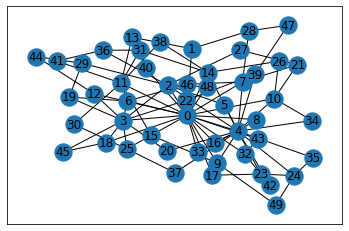

In [4]:
n = 50
m = 2
nx.draw_networkx(nx.barabasi_albert_graph(n, m))

Sabendo que se $A$ é a matrix de adjacências de um grafo e $P = A^l$, $P_{i,j}$ representa quantos caminhos de comprimento $l$  existem de $i$ até $j$ (VMLS, pág. 187) e que o diâmetro de um grafo é o menor $l$ para o qual existe pelos menos um caminho
entre todo par de vértices do grafo, definiremos o diâmetro de alguns grafos com diferentes valores de $n$ e $m$:

In [10]:
def diameter(A):
    """ Iguala P a A, então multiplica P por A enquanto existir 0s em P. """
    k = 0
    while(True):
        k = k + 1
        if k == 1: P = A
        else: P = P @ A
        if 0 not in P:
            return k

ns = [1000, 1000, 5000, 5000, 10000, 10000]
ms = [10, 100, 10, 100, 10, 100]
Ds = []

df = pd.DataFrame(ns, columns=['n'])
df['m'] = ms

for n, m in zip(ns, ms):
    A = nx.to_numpy_array(nx.barabasi_albert_graph(n, m))
    Ds.append(diameter(A))

df['D'] = Ds

df.style.hide_index()

n,m,D
1000,10,4
1000,100,2
5000,10,4
5000,100,3
10000,10,5
10000,100,3


---

## Questão 8.4

In [ ]:
import numpy as np
np.set_printoptions(precision=3)

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
n = int(len(x)**(1/2))
n

3

In [ ]:
# A) Turn the original image x upside-down.
def flatten(t):
    return [item for sublist in t for item in sublist]

def inverse(x, n):
  A = np.split(x.transpose(),n)
  y_m = np.flipud(np.array(A).transpose())
  y = flatten(y_m.transpose())
  return y

def upd_matrix(x, n):
  y_upd = inverse(x,n)
  return get_A(y_upd, n)

def get_A(y, n):
  A = np.zeros((n*n,n*n), dtype=int)
  for i, val in enumerate(y):
    if val != 0:
      A[i][val-1] += 1
  return A

In [ ]:
A = upd_matrix(x, n)
# Prova:
np.matmul(A, x)

array([3, 2, 1, 6, 5, 4, 9, 8, 7])

In [ ]:
# B) Rotate the original image x clockwise 90º

def rotate(x, n):
  A = np.split(x.transpose(),n)
  y_m = np.rot90(np.array(A).transpose())
  y = flatten(y_m.transpose())
  return y

def rtt_matrix(x, n):
  y_rtt = rotate(x,n)
  return get_A(y_rtt, n)

In [ ]:
A_rtt = rtt_matrix(x, n)
A_rtt

array([[0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Prova:
np.matmul(A_rtt,x)

array([7, 4, 1, 8, 5, 2, 9, 6, 3])

In [ ]:
# C) Translate the image up by 1 pixel and to the right by 1 pixel. 
# In the translated image, assign the value yi = 0 to the pixels
# in the first column and the last row.

def translate_1pu_1pr(x, n):
  A = np.array(np.split(x.transpose(),n))
  A = A.transpose()
  A = np.roll(A, -1, axis=0)
  A = np.roll(A, 1, axis=1)
  
  for i, val in enumerate(A):
    A[i][0] = 0
    A[-1][i] = 0
  A = A.transpose()
  y_m = np.array(A).transpose()
  y = flatten(y_m.transpose())
  return y

def trd_matrix(x, n):
  y_trd = translate_1pu_1pr(x,n)
  print(y_trd)
  return get_A(y_trd, n)

In [ ]:
translate_1pu_1pr(x,n)

[0, 0, 0, 2, 3, 0, 5, 6, 0]

In [ ]:
A_trd = trd_matrix(x,n)
A_trd


[0, 0, 0, 2, 3, 0, 5, 6, 0]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Prova:
np.matmul(A_trd, x)

array([0, 0, 0, 2, 3, 0, 5, 6, 0])

In [ ]:
# D) Set each pixel value yi to be the average of the neighbors of pixel i 
# in the original image. By neighbors, we mean the pixels immediately above and 
# below, and imme-diately to the left and right. 
# The center pixel has 4 neighbors; 
# corner pixels have 2 neighbors, 
# and the remaining pixels have 3 neighbors.

def average(x, n):
  A = np.array(np.split(x.transpose(),n))
  A = A.transpose()
  y_m = np.zeros((n,n))
  B = np.zeros((n*n, n*n))
  count = 0
  for j, val in enumerate(A):
    for i, _ in enumerate(val):
      sum = 0
      weight = 0
      elements = []
      # Vertical
      if i - 1 >= 0:
        sum += A[i - 1][j]
        weight += 1
        elements.append(A[i - 1][j])
      if i + 1 < n:
        sum += A[i + 1][j]
        weight += 1
        elements.append(A[i + 1][j])
      # Horizontal
      if j - 1 >= 0:
        sum += A[i][j - 1]
        weight += 1
        elements.append(A[i][j - 1])
      if j + 1 < n:
        sum += A[i][j + 1]
        weight += 1
        elements.append(A[i][j + 1])
      for element in elements:
        if element - 1 >= 0:
          B[count][element - 1] = 1/weight 
      y_m[i][j] = sum/weight
      count += 1
  y = flatten(y_m.transpose())
  return y, B

In [ ]:
y_avg, A_avg = average(x, n)

In [ ]:
print(A_avg)

[[0.    0.5   0.    0.5   0.    0.    0.    0.    0.   ]
 [0.333 0.    0.333 0.    0.333 0.    0.    0.    0.   ]
 [0.    0.5   0.    0.    0.    0.5   0.    0.    0.   ]
 [0.333 0.    0.    0.    0.333 0.    0.333 0.    0.   ]
 [0.    0.25  0.    0.25  0.    0.25  0.    0.25  0.   ]
 [0.    0.    0.333 0.    0.333 0.    0.    0.    0.333]
 [0.    0.    0.    0.5   0.    0.    0.    0.5   0.   ]
 [0.    0.    0.    0.    0.333 0.    0.333 0.    0.333]
 [0.    0.    0.    0.    0.    0.5   0.    0.5   0.   ]]


In [ ]:
# Prova
np.matmul(A_avg, x)

array([3.   , 3.   , 4.   , 4.333, 5.   , 5.667, 6.   , 7.   , 7.   ])

In [ ]:
y_avg

[3.0, 3.0, 4.0, 4.333333333333333, 5.0, 5.666666666666667, 6.0, 7.0, 7.0]